In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math
import re

In [2]:
"""df_eda = pd.read_excel('Resultats_presidentielles_2017_1er.xlsx')
colonnes_socle = list(df_eda.columns)[:18]
colonnes_bis=list(df_eda.columns)[18:25]
print(colonnes_socle)
print(colonnes_bis)
df_base = pd.DataFrame(columns=colonnes_socle+colonnes_bis)
print(df_base.shape)
n = len(colonnes_socle)
k=len(colonnes_bis)
for i in range(int((df_eda.shape[1]-n)/k)):
    colonnes = colonnes_socle+list(df_eda.iloc[:2,n+k*i:n+k*i+k].columns)
    #print(df_mid.shape)
    df_mid = df_eda[colonnes]
    df_mid.columns=colonnes_socle+colonnes_bis
    df_base = pd.concat([df_base,df_mid],axis=0)
    print(df_base.shape)"""

"df_eda = pd.read_excel('Resultats_presidentielles_2017_1er.xlsx')\ncolonnes_socle = list(df_eda.columns)[:18]\ncolonnes_bis=list(df_eda.columns)[18:25]\nprint(colonnes_socle)\nprint(colonnes_bis)\ndf_base = pd.DataFrame(columns=colonnes_socle+colonnes_bis)\nprint(df_base.shape)\nn = len(colonnes_socle)\nk=len(colonnes_bis)\nfor i in range(int((df_eda.shape[1]-n)/k)):\n    colonnes = colonnes_socle+list(df_eda.iloc[:2,n+k*i:n+k*i+k].columns)\n    #print(df_mid.shape)\n    df_mid = df_eda[colonnes]\n    df_mid.columns=colonnes_socle+colonnes_bis\n    df_base = pd.concat([df_base,df_mid],axis=0)\n    print(df_base.shape)"

In [3]:
df_eda = pd.read_csv('election-presidentielle-2017-resultats-par-bureaux-de-vote-tour-1.csv',sep=';')

In [4]:
url_geoloc = """https://www.data.gouv.fr/fr/datasets/r/dbe8a621-a9c4-4bc3-9cae-be1699c5ff25"""

In [5]:
df_geoloc = pd.read_csv(url_geoloc)

In [ ]:
df_eda

In [25]:
df_eda.groupby(['Code Insee'])

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,...,Voix,% Voix/Ins,% Voix/Exp,Code Insee,Coordonnées,Nom Bureau Vote,Adresse,Code Postal,Ville,uniq_bdv
0,77,Seine-et-Marne,7,7ème circonscription,438,Saint-Thibault-des-Vignes,0003,1063,283,26.62,...,101,9.50,13.32,77438,"48.854007,2.668821",Groupe scolaire Marie Curie,26 rue de l'Etang de la Loy,77400.0,Saint-Thibault-des-Vignes,Groupe scolaire Marie Curie - Saint-Thibault-...
1,38,Isère,5,5ème circonscription,2,Les Adrets,0001,779,106,13.61,...,7,0.90,1.06,38002,"45.271187,5.964303",Mairie,NaN,38190.0,Les Adrets,Mairie - Les Adrets
2,52,Haute-Marne,2,2ème circonscription,331,La Porte du Der,0001,1383,295,21.33,...,198,14.32,18.66,52331,"48.476677,4.771312",Halle au blé,10 place de l’Hôtel de ville,52220.0,La Porte du Der,Halle au blé - La Porte du Der
3,2B,Haute-Corse,1,1ère circonscription,33,Bastia,0022,1175,328,27.91,...,0,0.00,0.00,2B033,NaN,NaN,NaN,NaN,NaN,NaN
4,83,Var,6,6ème circonscription,16,Le Beausset,0007,869,149,17.15,...,2,0.23,0.28,83016,"43.196343,5.796027",Réféctoire de l'école maternelle Pagnol,Avenue des Tilleuls,83330.0,Le Beausset,Réféctoire de l'école maternelle Pagnol - Le ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761800,76,Seine-Maritime,3,3ème circonscription,575,Saint-Etienne-du-Rouvray,0012,820,210,25.61,...,17,2.07,2.85,76575,"49.398043,1.077767",École Joliot Curie,Rue Guynemer,76800.0,Saint-Étienne-du-Rouvray,École Joliot Curie - Saint-Étienne-du-Rouvray
761801,74,Haute-Savoie,6,6ème circonscription,273,Sixt-Fer-à-Cheval,0001,617,102,16.53,...,14,2.27,2.78,74273,"46.057914,6.750864",Maison montagne,Place du tilleuls,74740.0,Sixt-Fer-à-Cheval,Maison montagne - Sixt-Fer-à-Cheval
761802,16,Charente,1,1ère circonscription,15,Angoulême,0002,989,280,28.31,...,140,14.16,20.14,16015,"45.648631,0.15349",Ecole maternelle Comtesse de Ségur / Salle de ...,"3, place Henri Dunant",16000.0,Angoulême,Ecole maternelle Comtesse de Ségur / Salle de ...
761803,91,Essonne,6,6ème circonscription,477,Palaiseau,0003,982,200,20.37,...,99,10.08,13.03,91477,"48.711735,2.243977",Ecole élémentaire docteur Morère,"11, rue du docteur Morère",91120.0,Palaiseau,Ecole élémentaire docteur Morère - Palaiseau


In [7]:
len('ABCDE')

5

In [8]:
def correct_code_commune_INSEE(code_commune):
    valeur = code_commune
    if len(code_commune)==4:
        valeur = '0'+str(code_commune)
    return valeur

In [9]:
df_geoloc['Code Insee']=df_geoloc['code_commune_INSEE'].apply(correct_code_commune_INSEE)

In [10]:
df_eda.shape

(761805, 35)

In [11]:
df_eda_full=df_eda.merge(df_geoloc[['Code Insee','latitude','longitude']],left_on='Code Insee',right_on='Code Insee',how='left').drop_duplicates(['Code Insee','Bureau de vote','Voix','Nom'])

In [19]:
print((df_eda.shape,df_eda_full.shape))

((761805, 35), (761662, 37))


In [12]:
df_geoloc[df_geoloc['code_commune_INSEE']=='1262']

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region,Code Insee
264,1262,MONTLUEL,1120,MONTLUEL,NaN,45.890901,5.019876,262.0,NaN,Montluel,Montluel,1,Ain,84.0,Auvergne-Rhône-Alpes,01262
265,1262,MONTLUEL,1120,MONTLUEL,CORDIEUX,45.890901,5.019876,262.0,NaN,Montluel,Montluel,1,Ain,84.0,Auvergne-Rhône-Alpes,01262
266,1262,MONTLUEL,1120,MONTLUEL,JAILLEUX,45.890901,5.019876,262.0,NaN,Montluel,Montluel,1,Ain,84.0,Auvergne-Rhône-Alpes,01262


In [13]:
#print(df_eda_full[(df_eda_full['latitude'].isnull())].shape)#drop_duplicates(['Commune','Bureau de vote'])['Inscrits'].sum()
df_eda_full[(df_eda_full['latitude'].isnull())]['Commune'].value_counts()

Paris             9856
Marseille         5280
Lyon              3234
Saint-Denis       1463
Saint-Paul        1320
                  ... 
Achgabat            11
Port-Au-Prince      11
Stuttgart           11
Buenos Aires        11
Dusseldorf          11
Name: Commune, Length: 436, dtype: int64

In [14]:
df_eda[df_eda['Coordonnées'].isnull()]['Inscrits']

3         1175
7          117
8          752
11         110
12         177
          ... 
761777     768
761778     898
761787    1404
761792     905
761799     197
Name: Inscrits, Length: 154726, dtype: int64

In [15]:
def proper_coordonnees(element):
    valeur=0
    if type(element)==float:
        valeur=1
    return valeur

In [16]:
df_eda_clean = df_eda.dropna()

In [17]:
df_eda_clean['Coordonnées'].dropna().apply(lambda element:element.split(',')[0])

0         48.854007
2         48.476677
4         43.196343
5          43.39106
9         49.193569
            ...    
761797    43.604677
761800    49.398043
761801    46.057914
761802    45.648631
761803    48.711735
Name: Coordonnées, Length: 488158, dtype: object

In [18]:
df_eda_clean['Latitude']=df_eda_clean['Coordonnées'].dropna().apply(lambda element:element.split(',')[0]).astype(float)
df_eda_clean['Longitude']=df_eda_clean['Coordonnées'].dropna().apply(lambda element:element.split(',')[1]).astype(float)

<ipython-input-18-a2af356d2e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_clean['Latitude']=df_eda_clean['Coordonnées'].dropna().apply(lambda element:element.split(',')[0]).astype(float)
<ipython-input-18-a2af356d2e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_clean['Longitude']=df_eda_clean['Coordonnées'].dropna().apply(lambda element:element.split(',')[1]).astype(float)


In [31]:
df_eda_clean.head()

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Exp,Code Insee,Coordonnées,Nom Bureau Vote,Adresse,Code Postal,Ville,uniq_bdv,Latitude,Longitude
0,77,Seine-et-Marne,7,7ème circonscription,438,Saint-Thibault-des-Vignes,0003,1063,283,26.62,...,13.32,77438,"48.854007,2.668821",Groupe scolaire Marie Curie,26 rue de l'Etang de la Loy,77400.0,Saint-Thibault-des-Vignes,Groupe scolaire Marie Curie - Saint-Thibault-...,48.854007,2.668821
2,52,Haute-Marne,2,2ème circonscription,331,La Porte du Der,0001,1383,295,21.33,...,18.66,52331,"48.476677,4.771312",Halle au blé,10 place de l’Hôtel de ville,52220.0,La Porte du Der,Halle au blé - La Porte du Der,48.476677,4.771312
4,83,Var,6,6ème circonscription,16,Le Beausset,0007,869,149,17.15,...,0.28,83016,"43.196343,5.796027",Réféctoire de l'école maternelle Pagnol,Avenue des Tilleuls,83330.0,Le Beausset,Réféctoire de l'école maternelle Pagnol - Le ...,43.196343,5.796027
5,83,Var,5,5ème circonscription,61,Fréjus,0030,940,217,23.09,...,1.55,83061,"43.39106,6.728505",Ecole primaire de Villeneuve,Rue de l'Argentière,83370.0,Fréjus,Ecole primaire de Villeneuve - Fréjus,43.391060,6.728505
9,57,Moselle,1,1ère circonscription,645,Semécourt,0001,752,114,15.16,...,0.80,57645,"49.193569,6.134758",Mairie,3 Place de la République,57280.0,Semécourt,Mairie - Semécourt,49.193569,6.134758


In [34]:
df_sorted = df_eda_clean.groupby(['Code Insee','Nom']).agg({'Voix':sum,'Latitude':np.mean, 'Longitude':np.mean,'Ville':max,'Exprimés':max}).reset_index()
df_sorted['Dep'] = df_sorted['Code Insee'].apply(lambda element:element[:2])
df_max =df_sorted.sort_values(['Code Insee','Voix'],ascending=[1,0]).drop_duplicates(['Code Insee'])


In [47]:
df_eda.isnull().sum()

Code du département                0
Département                        0
Code de la circonscription         0
Circonscription                    0
Code de la commune                 0
Commune                            0
Bureau de vote                     0
Inscrits                           0
Abstentions                        0
% Abs/Ins                          0
Votants                            0
% Vot/Ins                          0
Blancs                             0
% Blancs/Ins                       0
% Blancs/Vot                       0
Nuls                               0
% Nuls/Ins                         0
% Nuls/Vot                         0
Exprimés                           0
% Exp/Ins                          0
% Exp/Vot                          0
N°Panneau                          0
Sexe                               0
Nom                                0
Prénom                             0
Voix                               0
% Voix/Ins                         0
%

In [46]:
df_eda[df_eda['Code Insee']=="93013"].isnull().sum()

Code du département            0
Département                    0
Code de la circonscription     0
Circonscription                0
Code de la commune             0
Commune                        0
Bureau de vote                 0
Inscrits                       0
Abstentions                    0
% Abs/Ins                      0
Votants                        0
% Vot/Ins                      0
Blancs                         0
% Blancs/Ins                   0
% Blancs/Vot                   0
Nuls                           0
% Nuls/Ins                     0
% Nuls/Vot                     0
Exprimés                       0
% Exp/Ins                      0
% Exp/Vot                      0
N°Panneau                      0
Sexe                           0
Nom                            0
Prénom                         0
Voix                           0
% Voix/Ins                     0
% Voix/Exp                     0
Code Insee                     0
Coordonnées                   77
Nom Bureau

In [67]:
# df_max[df_max['Dep'].isin(['77','78','91','92','93','94','95'])]

In [66]:
# fig,ax =plt.subplots(figsize=(10,7))
# sns.scatterplot(y='Latitude',x='Longitude',data=df_max[df_max['Dep'].isin(['75','77','78','91','92','93','94','95'])],ax=ax,hue='Nom',size='Voix')

In [65]:
# fig,ax =plt.subplots(figsize=(30,20))
# sns.scatterplot(y='Latitude',x='Longitude',data=df_max,ax=ax,hue='Nom',size='Exprimés')

In [18]:
df_max[df_max['Code Insee']=='69383']

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep


In [68]:
# fig,ax =plt.subplots(figsize=(10,7))
# sns.scatterplot(y='Latitude',x='Longitude',data=df_max[df_max['Dep'].isin(['59'])],ax=ax,hue='Nom',size='Voix')

In [17]:
df_paris = pd.read_csv('elections-presidentielles-2017-1ertour_Paris.csv',sep=';')
df_melt=df_paris[['ID_BVOTE']+list(df_paris.columns)[16:-2]].melt(id_vars=['ID_BVOTE'],var_name='Nom',value_name='Voix')
df_melt=df_melt.merge(df_paris[['ID_BVOTE','NB.EXPRIM']],left_on='ID_BVOTE',right_on='ID_BVOTE')
def good_insee_code(element):
    valeur = element.split('-')[0]
    if int(valeur)<10:
        code_insee='7510'+valeur
    else:
        code_insee='751'+valeur
    return code_insee
df_melt['Code Insee']=df_melt['ID_BVOTE'].apply(good_insee_code)
df_paris['Latitude']=df_paris['geo_point_2d'].apply(lambda element:element.split(',')[0]).astype(float)
df_paris['Longitude']=df_paris['geo_point_2d'].apply(lambda element:element.split(',')[1]).astype(float)

In [19]:
df_melt_bis = df_melt.merge(df_paris[['ID_BVOTE','Latitude','Longitude']],left_on='ID_BVOTE',right_on='ID_BVOTE')

In [20]:
df_max_paris=df_melt.groupby(['Code Insee','Nom'])[['Voix','NB.EXPRIM']].sum().reset_index().sort_values(['Code Insee','Voix'],ascending=[1,0]).drop_duplicates(['Code Insee'])

In [21]:
#df_max_paris.merge(df_geoloc[['code_commune_insee','Latitude','Longitude']],left_on='Code Insee',right_on=['Code'])

In [22]:
df_paris_viz = df_melt_bis.sort_values(['ID_BVOTE','Voix'],ascending=[1,0]).drop_duplicates(['ID_BVOTE'])

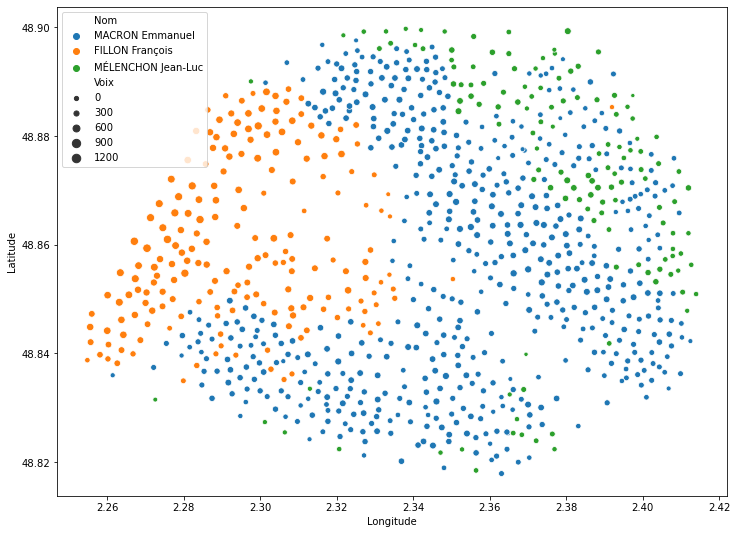

In [23]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(x='Longitude',y='Latitude',data=df_paris_viz,hue='Nom',size='Voix')

In [24]:
df_paris_group = df_melt.groupby(['Code Insee','Nom'])[['Voix','NB.EXPRIM']].sum().reset_index()

In [25]:
df_geoloc.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes


In [26]:
df_paris_final=df_paris_group.merge(df_geoloc[['code_commune_INSEE','latitude','longitude','nom_commune']],left_on='Code Insee',right_on='code_commune_INSEE').drop_duplicates()

In [27]:
df_geoloc[df_geoloc['code_commune_INSEE']=='75116']

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
32628,75116,PARIS 16,75016,PARIS,NaN,48.860399,2.2621,116.0,NaN,Paris 16,Paris 16,75,Paris,11.0,Île-de-France
32629,75116,PARIS 16,75116,PARIS,NaN,48.860399,2.2621,116.0,NaN,Paris 16,Paris 16,75,Paris,11.0,Île-de-France


In [28]:
df_sorted.head()

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep
0,01002,ARTHAUD,2,46.006461,5.42051,L'Abergement-de-Varey,176,01
1,01002,ASSELINEAU,1,46.006461,5.42051,L'Abergement-de-Varey,176,01
2,01002,CHEMINADE,0,46.006461,5.42051,L'Abergement-de-Varey,176,01
3,01002,DUPONT-AIGNAN,6,46.006461,5.42051,L'Abergement-de-Varey,176,01
4,01002,FILLON,34,46.006461,5.42051,L'Abergement-de-Varey,176,01


In [29]:
df_paris_final.head()

,Code Insee,Nom,Voix,NB.EXPRIM,code_commune_INSEE,latitude,longitude,nom_commune
0,75101,ARTHAUD Nathalie,15,9026,75101,48.86263,2.336293,Paris 01
1,75101,ASSELINEAU François,58,9026,75101,48.86263,2.336293,Paris 01
2,75101,CHEMINADE Jacques,11,9026,75101,48.86263,2.336293,Paris 01
3,75101,DUPONT-AIGNAN Nicolas,128,9026,75101,48.86263,2.336293,Paris 01
4,75101,FILLON François,2831,9026,75101,48.86263,2.336293,Paris 01


In [30]:
df_paris_final['Dep']='75'
df_paris_final.rename(columns={'code_commune_INSEE':'Code Insee','nom_commune':'Ville','longitude':'Longitude',
                              'latitude':'Latitude','NB.EXPRIM':'Exprimés'},inplace=True)

In [31]:
mapping={}
for candidat in df_sorted['Nom'].unique():
    for candidat_bis in df_paris_final['Nom'].unique():
        if candidat in candidat_bis:
            mapping[candidat_bis]=candidat

In [32]:
df_paris_final['Nom']=df_paris_final['Nom'].map(mapping)

In [33]:
df_sorted

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep
0,01002,ARTHAUD,2,46.006461,5.420510,L'Abergement-de-Varey,176,01
1,01002,ASSELINEAU,1,46.006461,5.420510,L'Abergement-de-Varey,176,01
2,01002,CHEMINADE,0,46.006461,5.420510,L'Abergement-de-Varey,176,01
3,01002,DUPONT-AIGNAN,6,46.006461,5.420510,L'Abergement-de-Varey,176,01
4,01002,FILLON,34,46.006461,5.420510,L'Abergement-de-Varey,176,01
...,...,...,...,...,...,...,...,...
234361,95682,LASSALLE,1,49.072384,2.390205,Villiers-le-Sec,106,95
234362,95682,LE PEN,17,49.072384,2.390205,Villiers-le-Sec,106,95
234363,95682,MACRON,26,49.072384,2.390205,Villiers-le-Sec,106,95
234364,95682,MÉLENCHON,21,49.072384,2.390205,Villiers-le-Sec,106,95


In [34]:
df_paris_final[list(df_sorted.columns)].iloc[:,1:]

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep
0,75101,ARTHAUD,15,48.862630,2.336293,Paris 01,9026,75
1,75101,ASSELINEAU,58,48.862630,2.336293,Paris 01,9026,75
2,75101,CHEMINADE,11,48.862630,2.336293,Paris 01,9026,75
3,75101,DUPONT-AIGNAN,128,48.862630,2.336293,Paris 01,9026,75
4,75101,FILLON,2831,48.862630,2.336293,Paris 01,9026,75
...,...,...,...,...,...,...,...,...
226,75120,LASSALLE,481,48.863187,2.400820,Paris 20,89574,75
227,75120,LE PEN,5305,48.863187,2.400820,Paris 20,89574,75
228,75120,MACRON,27399,48.863187,2.400820,Paris 20,89574,75
229,75120,MÉLENCHON,28512,48.863187,2.400820,Paris 20,89574,75


In [35]:
df_sorted.shape

(234366, 8)

In [36]:
df_sorted_final=pd.concat([df_sorted, df_paris_final[list(df_sorted.columns)].iloc[:,1:]])

In [37]:
df_max =df_sorted_final.sort_values(['Code Insee','Voix'],ascending=[1,0]).drop_duplicates(['Code Insee'])

In [38]:
df_max

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep
7,01002,LE PEN,48,46.006461,5.420510,L'Abergement-de-Varey,176,01
18,01004,LE PEN,1055,45.962781,5.349062,Ambérieu-en-Bugey,860,01
31,01006,MÉLENCHON,19,45.749296,5.601283,Ambléon,77,01
41,01009,MACRON,55,45.793989,5.655396,Andert-et-Condon,209,01
52,01015,MACRON,111,45.713571,5.643105,Arboys en Bugey,340,01
...,...,...,...,...,...,...,...,...
234318,95675,LE PEN,137,49.057415,2.542222,Villeron,462,95
234326,95676,FILLON,110,49.085387,1.723734,Villers-en-Arthies,334,95
234337,95678,FILLON,139,49.064392,2.235136,Villiers-Adam,535,95
234353,95680,MÉLENCHON,2932,49.005362,2.394313,Villiers-le-Bel,836,95


In [50]:
[ville for ville in df_max['Ville'].unique() if "Bourget" in ville]

[]

In [48]:
df_sorted_final[df_sorted_final["Ville"].isin([ville for ville in df_sorted_final['Ville'].unique() if "Le Bourget" in ville])]

,Code Insee,Nom,Voix,Latitude,Longitude,Ville,Exprimés,Dep,Pourcentage_vote


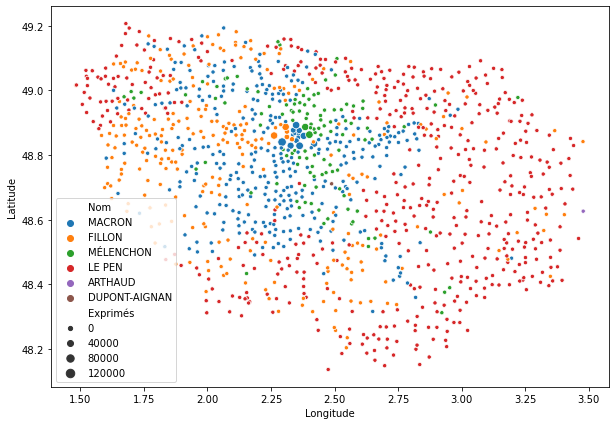

In [39]:
fig,ax =plt.subplots(figsize=(10,7))
sns.scatterplot(y='Latitude',x='Longitude',data=df_max[df_max['Dep'].isin(['75','77','78','91','92','93','94','95'])],ax=ax,hue='Nom',size='Exprimés')

In [40]:
df_sorted_final['Pourcentage_vote']=df_sorted_final['Voix']/df_sorted_final['Exprimés']

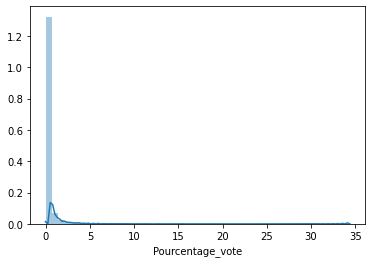

In [41]:
sns.distplot(df_sorted_final[df_sorted_final['Nom']=='Macron'.upper()]['Pourcentage_vote'])

In [51]:
df_sorted_final[df_sorted_final['Pourcentage_vote']>1]['Dep'].value_counts()

59    254
78    203
62    189
91    187
94    174
     ... 
46      3
48      3
24      2
23      2
70      1
Name: Dep, Length: 91, dtype: int64

In [62]:
df_eda.sort_values(['Code Insee','Voix']).iloc[:10,10:30]

,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Code Insee,Coordonnées
501055,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,7,M,CHEMINADE,Jacques,2,0.33,0.40,01001,NaN
507679,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,8,M,LASSALLE,Jean,2,0.33,0.40,01001,NaN
103645,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,6,M,POUTOU,Philippe,4,0.67,0.81,01001,NaN
392649,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,5,F,ARTHAUD,Nathalie,4,0.67,0.81,01001,NaN
579838,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,10,M,ASSELINEAU,François,6,1.00,1.21,01001,NaN
680288,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,4,M,HAMON,Benoît,29,4.85,5.86,01001,NaN
326002,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,1,M,DUPONT-AIGNAN,Nicolas,34,5.69,6.87,01001,NaN
200182,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,9,M,MÉLENCHON,Jean-Luc,59,9.87,11.92,01001,NaN
611838,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,11,M,FILLON,François,110,18.39,22.22,01001,NaN
17839,506,84.62,2,0.33,0.4,9,1.51,1.78,495,82.78,97.83,3,M,MACRON,Emmanuel,119,19.90,24.04,01001,NaN


In [70]:
len(df_sorted_final)

234586

In [71]:
df_sorted_final_merged =df_sorted_final.merge(df_sorted_final.groupby(['Code Insee'])['Voix'].sum().reset_index().rename(columns={'Voix':'Total Voix'}),left_on='Code Insee',right_on='Code Insee')

In [74]:
df_sorted_final_merged['Exprimes_bis']=df_sorted_final_merged['Voix']/df_sorted_final_merged['Total Voix']

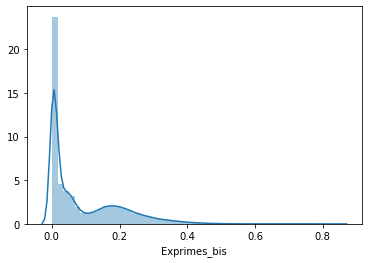

In [75]:
sns.distplot(df_sorted_final_merged['Exprimes_bis'])

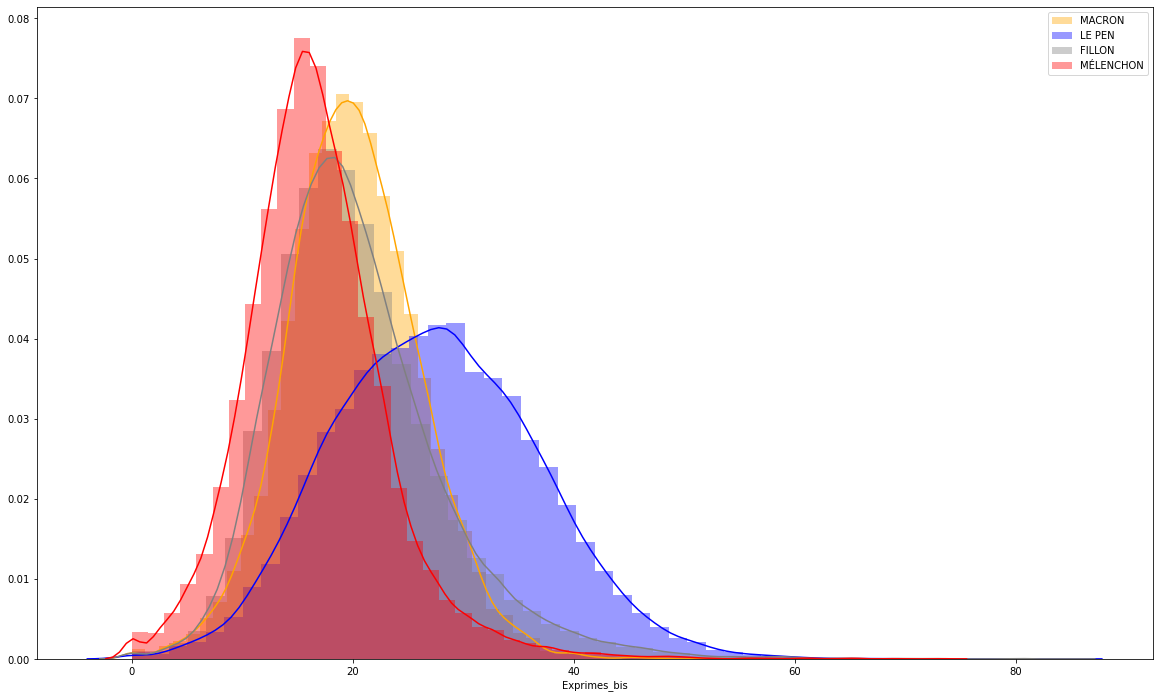

In [89]:
couleurs=['orange','blue','grey','red']
fig,axes = plt.subplots(1,1,figsize=(20,12))
for i, candidat in enumerate(list(df_sorted_final_merged.groupby(['Nom'])['Voix'].sum().sort_values(ascending=False).index)[:4]):
    sns.distplot(100*df_sorted_final_merged[df_sorted_final_merged['Nom']==candidat]['Exprimes_bis'],ax=axes,label=candidat, color=couleurs[i])
plt.legend()


In [91]:
df_sorted_final_merged.to_csv('dataset_votes_presidentielles.csv')

In [94]:
df_test=pd.read_csv('https://www.data.gouv.fr/s/resources/election-presidentielle-des-23-avril-et-7-mai-2017-resultats-definitifs-du-1er-tour-par-bureaux-de-vote/20170427-100955/PR17_BVot_T1_FE.txt',
            sep=';',encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
df_test = df_test.reset_index()

In [106]:
df_test.iloc[:2,0:40]

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,level_30,level_31,level_32,level_33,level_34,level_35,level_36,level_37,level_38,level_39
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,1,598,92,"15,38",...,LE PEN,Marine,126,"21,07","25,45",3,M,MACRON,Emmanuel,119
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,1,209,25,"11,96",...,LE PEN,Marine,48,"22,97","27,27",3,M,MACRON,Emmanuel,37


In [97]:
df_sorted_final_merged['Code Insee'].nunique()

21326

In [109]:
df_test[df_test['level_5']=='Paris']#.to_excel('Lyon.xlsx')

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp
51451,75,Paris,1,1ère circonscription,56,Paris,101,1079,153,"14,18",...,10,"0,93","1,09",11,M,FILLON,François,295,"27,34","32,28"
51452,75,Paris,1,1ère circonscription,56,Paris,102,1172,181,"15,44",...,3,"0,26","0,31",11,M,FILLON,François,254,"21,67","25,97"
51453,75,Paris,1,1ère circonscription,56,Paris,103,1155,198,"17,14",...,13,"1,13","1,37",11,M,FILLON,François,210,"18,18","22,18"
51454,75,Paris,1,1ère circonscription,56,Paris,104,1300,231,"17,77",...,10,"0,77","0,95",11,M,FILLON,François,226,"17,38","21,48"
51455,75,Paris,1,1ère circonscription,56,Paris,105,1057,146,"13,81",...,3,"0,28","0,33",11,M,FILLON,François,229,"21,67","25,33"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52342,75,Paris,18,18ème circonscription,56,Paris,1836,1504,196,"13,03",...,4,"0,27","0,31",11,M,FILLON,François,222,"14,76","17,17"
52343,75,Paris,18,18ème circonscription,56,Paris,1837,1583,232,"14,66",...,14,"0,88","1,05",11,M,FILLON,François,308,"19,46","23,18"
52344,75,Paris,18,18ème circonscription,56,Paris,1849,1112,357,"32,10",...,11,"0,99","1,51",11,M,FILLON,François,64,"5,76","8,77"
52345,75,Paris,18,18ème circonscription,56,Paris,1850,1054,282,"26,76",...,9,"0,85","1,21",11,M,FILLON,François,68,"6,45","9,13"


In [117]:
df_test.sort_values(['level_0','level_3','level_6']).iloc[:2,:20]

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18,level_19
24,1,Ain,1,1ère circonscription,16,Arbigny,1,317,65,"20,50",252,"79,50",5,"1,58","1,98",1,"0,32","0,40",246,"77,60"
30,1,Ain,1,1ère circonscription,24,Attignat,1,847,134,"15,82",713,"84,18",13,"1,53","1,82",3,"0,35","0,42",697,"82,29"


In [122]:
df_eda_clean.sort_values(['Code du département','Circonscription','Code de la commune']).drop_duplicates('Code de la commune').iloc[:2,:20]

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins
28878,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,252,79.50,5,1.58,1.98,1,0.32,0.40,246,77.60
1926,01,Ain,1,1ère circonscription,53,Bourg-en-Bresse,0019,1653,414,25.05,1239,74.95,19,1.15,1.53,3,0.18,0.24,1217,73.62


In [112]:
df_eda_clean.sort_values(['Code du département','Circonscription','Code de la commune'])

,Code du département,Département,Code de la circonscription,Circonscription,Code de la commune,Commune,Bureau de vote,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Exp,Code Insee,Coordonnées,Nom Bureau Vote,Adresse,Code Postal,Ville,uniq_bdv,Latitude,Longitude
28878,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,...,2.03,01016,"46.470434,4.970227",Mairie,Blaises,1190.0,Arbigny,Mairie - Arbigny,46.470434,4.970227
100989,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,...,19.11,01016,"46.470434,4.970227",Mairie,Blaises,1190.0,Arbigny,Mairie - Arbigny,46.470434,4.970227
137230,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,...,0.81,01016,"46.470434,4.970227",Mairie,Blaises,1190.0,Arbigny,Mairie - Arbigny,46.470434,4.970227
156833,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,...,30.08,01016,"46.470434,4.970227",Mairie,Blaises,1190.0,Arbigny,Mairie - Arbigny,46.470434,4.970227
367889,01,Ain,1,1ère circonscription,16,Arbigny,0001,317,65,20.50,...,20.33,01016,"46.470434,4.970227",Mairie,Blaises,1190.0,Arbigny,Mairie - Arbigny,46.470434,4.970227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501900,95,Val-d'Oise,9,9ème circonscription,682,Villiers-le-Sec,0001,120,10,8.33,...,0.94,95682,"49.072384,2.390205",Mairie annexe,6 rue de Paris,95720.0,Villiers-le-Sec,Mairie annexe - Villiers-le-Sec,49.072384,2.390205
563624,95,Val-d'Oise,9,9ème circonscription,682,Villiers-le-Sec,0001,120,10,8.33,...,19.81,95682,"49.072384,2.390205",Mairie annexe,6 rue de Paris,95720.0,Villiers-le-Sec,Mairie annexe - Villiers-le-Sec,49.072384,2.390205
642649,95,Val-d'Oise,9,9ème circonscription,682,Villiers-le-Sec,0001,120,10,8.33,...,19.81,95682,"49.072384,2.390205",Mairie annexe,6 rue de Paris,95720.0,Villiers-le-Sec,Mairie annexe - Villiers-le-Sec,49.072384,2.390205
680776,95,Val-d'Oise,9,9ème circonscription,682,Villiers-le-Sec,0001,120,10,8.33,...,24.53,95682,"49.072384,2.390205",Mairie annexe,6 rue de Paris,95720.0,Villiers-le-Sec,Mairie annexe - Villiers-le-Sec,49.072384,2.390205


In [125]:
df_second = pd.read_excel('Lyon.xlsx').drop(columns=['Unnamed: 0'])

In [126]:
df_second

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Voix.9,% Voix/Ins.9,% Voix/Exp.9,N°Panneau.10,Sexe.10,Nom.10,Prénom.10,Voix.10,% Voix/Ins.10,% Voix/Exp.10
0,69,Rhône,1,1ère circonscription,123,Lyon,211,923,178,"19,28",...,5,"0,54","0,69",11,M,FILLON,François,161,"17,44","22,15"
1,69,Rhône,1,1ère circonscription,123,Lyon,212,847,144,"17,00",...,7,"0,83","1,01",11,M,FILLON,François,139,"16,41","20,14"
2,69,Rhône,1,1ère circonscription,123,Lyon,213,820,168,"20,49",...,6,"0,73","0,94",11,M,FILLON,François,112,"13,66","17,50"
3,69,Rhône,1,1ère circonscription,123,Lyon,214,1035,189,"18,26",...,7,"0,68","0,84",11,M,FILLON,François,156,"15,07","18,71"
4,69,Rhône,1,1ère circonscription,123,Lyon,219,730,189,"25,89",...,4,"0,55","0,75",11,M,FILLON,François,87,"11,92","16,23"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,69,Rhône,4,4ème circonscription,123,Lyon,816,680,186,"27,35",...,2,"0,29","0,42",11,M,FILLON,François,81,"11,91","16,84"
290,69,Rhône,4,4ème circonscription,123,Lyon,817,1086,260,"23,94",...,5,"0,46","0,62",11,M,FILLON,François,97,"8,93","12,06"
291,69,Rhône,4,4ème circonscription,123,Lyon,818,965,338,"35,03",...,11,"1,14","1,78",11,M,FILLON,François,68,"7,05","11,02"
292,69,Rhône,4,4ème circonscription,123,Lyon,819,800,360,"45,00",...,8,"1,00","1,85",11,M,FILLON,François,32,"4,00","7,41"
